Predicting the success of a project

In [1]:
path = "~/calpoly/Data301/Data301FinalProject/datasets/processed/final/ks201901.csv"

In [2]:
import pandas as pd
import numpy as np

ks201901 = pd.read_csv(path)
ks201901.head()


,id,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,...,usd_pledged,parent_category,category,created_at_clean,state_changed_at_clean,launched_at_clean,deadline_clean,project_duration,time_til_state_changed,avg_pledge
0,1504859185,1,An eco-friendly coffee table that is both func...,US,1473631551,USD,1480966943,5000.0,1478371343,Industrial Bamboo Table,...,240.000000,crafts,woodworking,2016-09-11 22:05:51,2016-12-05 19:42:23,2016-11-05 18:42:23,2016-12-05 19:42:23,84 days 21:36:32.000000000,84 days 21:36:32.000000000,240.000000
1,49266114,3,We take digital uploads and make them handpain...,CA,1436540372,CAD,1440417634,1000.0,1437480034,"Custom Pet Portraits on Canvas- ""From Pixels t...",...,247.950175,art,painting,2015-07-10 14:59:32,2015-08-24 12:00:34,2015-07-21 12:00:34,2015-08-24 12:00:34,44 days 21:01:02.000000000,44 days 21:01:02.000000000,82.650058
2,1228074690,243,We are a team of restaurant pros looking to fu...,US,1427218874,USD,1431706954,35000.0,1429114954,The Barmobile: Boston's Mobile Cocktail Cateri...,...,41738.000000,food,food trucks,2015-03-24 17:41:14,2015-05-15 16:22:34,2015-04-15 16:22:34,2015-05-15 16:22:34,51 days 22:41:20.000000000,51 days 22:41:20.000000000,171.761317
3,330962986,27,"Loosely-based on a Lakota legend, Grandfather ...",US,1495110632,USD,1500217383,3000.0,1496329383,Grandfather Thunder & The Night Horses,...,3115.000000,publishing,children's books,2017-05-18 12:30:32,2017-07-16 15:03:04,2017-06-01 15:03:03,2017-07-16 15:03:03,59 days 02:32:31.000000000,59 days 02:32:32.000000000,115.370370
4,1657821447,3,Save me is a feature film about a depression s...,IE,1450121921,EUR,1455328590,15000.0,1450144590,Save Me-A film to hightlight depression (Cance...,...,660.680598,film & video,movie theaters,2015-12-14 19:38:41,2016-02-10 00:54:26,2015-12-15 01:56:30,2016-02-13 01:56:30,60 days 06:17:49.000000000,57 days 05:15:45.000000000,220.226866


In [3]:
ks201901.columns

Index(['id', 'backers_count', 'blurb', 'country', 'created_at', 'currency',
       'deadline', 'goal', 'launched_at', 'name', 'pledged', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at', 'urls',
       'usd_pledged', 'parent_category', 'category', 'created_at_clean',
       'state_changed_at_clean', 'launched_at_clean', 'deadline_clean',
       'project_duration', 'time_til_state_changed', 'avg_pledge'],
      dtype='object')

In [4]:
len(ks201901)

180934

In [ ]:
ks201901["state"].value_counts()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer

Y_train = ks201901[ks201901["state"] != "live"]
Y_train = Y_train[Y_train["state"] != "canceled"]
Y_train = Y_train[Y_train["state"] != "suspended"]
Y_train = Y_train["state"]

ks201901done = ks201901[(ks201901["state"] != "live")]
ks201901done = ks201901done[(ks201901done["state"] != "canceled")]
ks201901done = ks201901done[(ks201901done["state"] != "suspended")]



modelKnear = KNeighborsClassifier(n_neighbors=13)
def get_accuracy(feats):
    X_train = ks201901done[feats].fillna("")
    vec = DictVectorizer(sparse=False)

    modelKnear = KNeighborsClassifier(n_neighbors=5)

    pipeline = Pipeline([("vec", vec), ("model", modelKnear)])
    return cross_val_score(pipeline,X_train.to_dict(orient="records"), Y_train,cv=5, scoring='accuracy').mean()

#replace model with a pipeline

Trying different features to see what produces the highest accuracy

In [19]:
get_accuracy(["avg_pledge"])

0.7640650447620939

In [20]:
get_accuracy(["goal"])

0.554229268026529

In [21]:
get_accuracy(["backers_count"])

0.8589411367050189

In [22]:
get_accuracy(["usd_pledged"])

0.8413502089298888

We can not use spotlight to predict if a project will be successful because spotlights are given to projects that are successful.

In [23]:
get_accuracy(["spotlight"])

1.0

In [24]:
get_accuracy(["backers_count","usd_pledged"])

0.8639620151976798

In [25]:
get_accuracy(["avg_pledge", "goal"])

0.7817980507477482

In [26]:
get_accuracy(["avg_pledge", "goal","usd_pledged"])

0.9826518478085952

In [27]:
get_accuracy(["avg_pledge", "goal","backers_count"])

0.9727936007042995

We found this combonation of variables resulted in the highest accuracy.

In [28]:
get_accuracy(["avg_pledge", "goal","backers_count","usd_pledged"])

0.982657768471699

Now to find the optimal K for knearest neighbors model.

My laptop was not having the number of observations to utilize cross val score. So I will have to randomly sample the set.

In [29]:
import random
new_df = pd.DataFrame(columns=["avg_pledge", "goal","backers_count","usd_pledged","blurb", "state"],index=range(0,10000))
for k in range(0, 10000):
    new_df.loc[k] = (ks201901.loc[random.randint(0,len(ks201901)-1)]\
                 [["avg_pledge", "goal","backers_count","usd_pledged", "blurb","state"]])

In [53]:
sample_Y_train = new_df[new_df["state"] != "live"]
sample_Y_train = sample_Y_train[sample_Y_train["state"] != "canceled"]
sample_Y_train = sample_Y_train[sample_Y_train["state"] != "suspended"]
sample_Y_train = sample_Y_train["state"]

sampled = new_df[(new_df["state"] != "live")]
sampled = sampled[(sampled["state"] != "canceled")]
sampled = sampled[(sampled["state"] != "suspended")]

In [32]:
len(new_df)

10000

In [31]:
def get_accuracy_k():
    cv_score = []
    X_train = sampled[["avg_pledge", "goal","backers_count","usd_pledged"]].fillna("")
    
    for k in range(1,50):
        
        vec = DictVectorizer(sparse=False)

        model = KNeighborsClassifier(n_neighbors=k)

        pipeline = Pipeline([("vec", vec), ("model", model)])
        cv_score.append(cross_val_score(pipeline,X_train.to_dict(orient="records"),
                                    sample_Y_train,cv=5, scoring='accuracy').mean())
    return cv_score

14

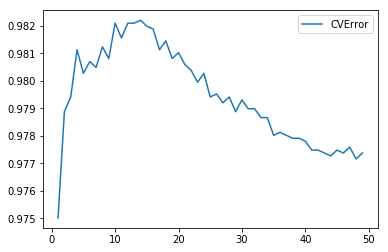

In [33]:
error = get_accuracy_k()
ks1=pd.Series(index=range(1,50), data=error)
df = pd.DataFrame(ks1, columns= ["CVError"],index=range(1,50))
df.plot.line()
df.CVError.idxmax()

from this model, We recieve a k that is 14 is the most optimal.

In [34]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



def get_accuracy_k_tfidf_pt1(k):
    Y_train = sample_Y_train.loc[1000:]
    X_train = sampled.loc[1000:]
    vec = TfidfVectorizer(max_features=50)
    X_train = X_train.blurb.fillna("")
    model = KNeighborsClassifier(n_neighbors=k)
    pipeline = Pipeline([("vec", vec), ("model", model)])
    return cross_val_score(pipeline,X_train, Y_train,cv=5, scoring='accuracy').mean()

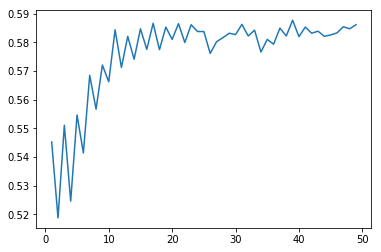

In [35]:
kstfidf=pd.Series(index=range(1,50), data = range(1,50))
#ks.index=range(1,100)
#ks_df = pd.DataFrame(columns=[["accuracy", "f1"]]) 
kstfidf.apply(get_accuracy_k_tfidf_pt1).plot.line()

Attempted to incorporate blurbs, by looking at the first 1000, however these do not have any correlation or significance to predicting the state. Many of the values came out to .60 which isn't much better than just gussing that everything is successful.

In [36]:
new_df.state.value_counts()/len(new_df)

successful    0.5184
failed        0.4141
canceled      0.0487
live          0.0142
suspended     0.0046
Name: state, dtype: float64

In [56]:
def get_accuracy_14(feats):
    X_train = ks201901done[feats].fillna("")
    Y_train = ks201901[ks201901["state"] != "live"]
    Y_train = Y_train[Y_train["state"] != "canceled"]
    Y_train = Y_train[Y_train["state"] != "suspended"]
    Y_train = Y_train["state"]
    vec = DictVectorizer(sparse=False)

    modelKnear = KNeighborsClassifier(n_neighbors=14)

    pipeline = Pipeline([("vec", vec), ("model", modelKnear)])
    return cross_val_score(pipeline,X_train.to_dict(orient="records"), Y_train,cv=5, scoring='accuracy').mean()

In [57]:
get_accuracy_14(["avg_pledge", "goal","backers_count","usd_pledged"])

0.9832024936668388

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


def randomforestclassifier(k):
    X_train = sampled[["avg_pledge", "goal","backers_count","usd_pledged"]].fillna(0)
    Y_train = sample_Y_train
    model = RandomForestClassifier(n_estimators=k)
    return cross_val_score(model,X_train, 
                           Y_train, cv = 10, 
                           scoring="accuracy").mean()


In [40]:
ksrfc = pd.Series(index=range(1,75), data = range(1,75))
df=pd.DataFrame(data=ksrfc.apply(randomforestclassifier), index=range(1,75),columns=["TestError"])

TestError                0.978981
Number of Estimators    62.000000
Name: 62, dtype: float64


,TestError,Number of Estimators
1,0.957531,1
2,0.963003,2
3,0.970831,3
4,0.971689,4
5,0.974156,5


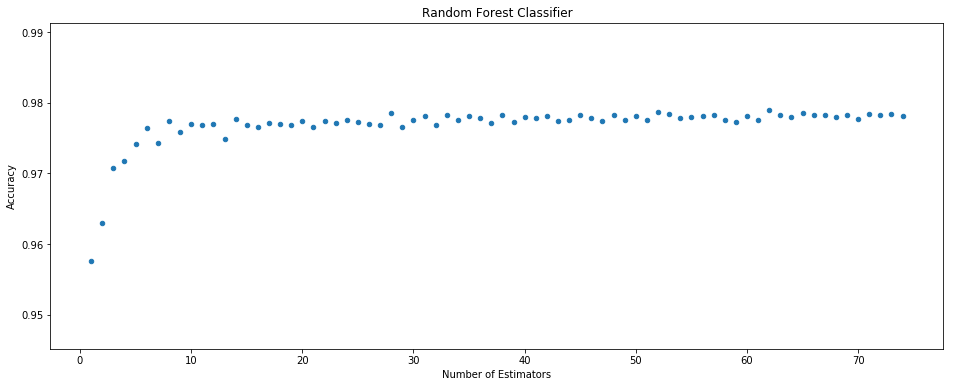

In [41]:
df["Number of Estimators"] = range(1,75)
ax = df.plot.scatter(x="Number of Estimators",y="TestError")
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("Accuracy")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.title("Random Forest Classifier")
print(df.loc[df.TestError.idxmax()])
df.sort_values("TestError").head(5)

given these models, I can conclude:
    Knearest neighbors optimized will give us an accuracy of .983
    Random forest optimized will give us an accuracy of .980
Which are both high accuracies. For the purpose of predicting, I will use knearest neighbors because it is slightly better than random forest
    

From Januray and February, these observations have been randomly sampled from both months such that I can validate this model using test error from projects that were live in January, but finished in Febreuary.

In [42]:
path = "~/calpoly/Data301/Data301FinalProject/datasets/processed/final/ks201901-201902.csv"

In [43]:
ks2019months = pd.read_csv(path)
ks2019months.head()


,id,backers_count201901,blurb,country,created_at,currency,deadline,goal,launched_at,name,...,avg_pledge201901,backers_count201902,staff_pick201902,state201902,state_changed_at201902,state_changed_at_clean201902,project_duration201902,time_til_state_changed201902,usd_pledged201902,avg_pledge201902
0,1951787043,72,A flexible pack you can customise and decorate...,HK,1544434144,HKD,1548981017,25000.0,1546389017,"RAINBOW WINDOW - The Bold, Bright Backpack for...",...,49.211627,76,False,successful,1548981018,2019-02-01 00:30:18,4546873,4546874,3719.416000,48.939684
1,1145162484,1,"Somos un dúo de música urbana latina, que busc...",MX,1544666771,MXN,1549897113,250000.0,1544713113,#NosotrosSomosLosMejoresBaby,...,0.931424,1,False,failed,1549897115,2019-02-11 14:58:35,5230342,5230344,0.931424,0.931424
2,835262605,19,A collection of Korok leaf spirit enamel pins ...,US,1545857415,USD,1549575215,800.0,1546983215,Korok Enamel Pins,...,15.578947,24,False,failed,1549575215,2019-02-07 21:33:35,3717800,3717800,406.000000,16.916667
3,1600105046,46,Little enamel pins of some of the cutest marin...,CA,1543126075,CAD,1549134657,1000.0,1546542657,Ocean Friend Pins,...,20.788807,61,False,successful,1549134658,2019-02-02 19:10:58,6008582,6008583,1310.141920,21.477736
4,1371675865,29,Una librería para gente que sí lee. Un espacio...,MX,1546441686,MXN,1548171022,30000.0,1546875022,Invernadero 156. Make/100,...,29.905911,54,False,successful,1548171022,2019-01-22 15:30:22,1729336,1729336,1837.943188,34.035985


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


Y_train = ks2019months[ks2019months["state201902"] != "live"]
Y_train = Y_train[Y_train["state201902"] != "canceled"]
Y_train = Y_train[Y_train["state201902"] != "suspended"]
Y_train = Y_train["state201902"]

ks201902done = ks2019months[(ks2019months["state201902"] != "live")]
ks201902done = ks201902done[(ks201902done["state201902"] != "canceled")]
ks201902done = ks201902done[(ks201902done["state201902"] != "suspended")]

cv_error = []
def get_accuracy(feats):
    X_train = ks201902done[feats].fillna("")
    vec = DictVectorizer(sparse=False)
    scaler = StandardScaler()
    for k in range(1,50):
        modelKnear = KNeighborsClassifier(n_neighbors=k)
        pipeline = Pipeline([("vec", vec),("scaler", scaler), ("model", modelKnear)])
        cv_error.append(cross_val_score(pipeline,X_train.to_dict(orient="records"),\
                                        Y_train,cv=5, scoring='accuracy').mean())

In [45]:
cv_error = []
get_accuracy(["avg_pledge201902", "goal","backers_count201902","usd_pledged201901"])
df = pd.DataFrame(cv_error, columns= ["TestError"],index=range(1,50))
df.TestError.idxmax()

5

N-neighbors of 5 resulted in the knearest neighbors classifier with the highest accuracy.

In [46]:
from sklearn.neighbors import KNeighborsClassifier

Y_train = ks2019months[ks2019months["state201902"] != "live"]
Y_train = Y_train[Y_train["state201902"] != "canceled"]
Y_train = Y_train[Y_train["state201902"] != "suspended"]
Y_train = Y_train["state201902"]

X_test = ks2019months[ks2019months["state201901"] == "live"]
X_test = X_test[["avg_pledge201901", "goal","backers_count201901","usd_pledged201901"]].fillna(0)

ks201902done = ks2019months[(ks2019months["state201902"] != "live")]
ks201902done = ks201902done[(ks201902done["state201902"] != "canceled")]
ks201902done = ks201902done[(ks201902done["state201902"] != "suspended")]

X_train = ks201902done[["avg_pledge201902", "goal","backers_count201902","usd_pledged201901"]].fillna(0)

modelKnear = KNeighborsClassifier(n_neighbors=5)
modelKnear.fit(X_train,Y_train)
quant_pred_prob = modelKnear.predict_proba(X_test)
quant_pred = modelKnear.predict(X_test)

In [47]:
ks2019months["pred_state"] = quant_pred.tolist()

In [48]:
ks2019months[["state201902","pred_state"]]

,state201902,pred_state
0,successful,failed
1,failed,failed
2,failed,failed
3,successful,successful
4,successful,failed
5,successful,successful
6,successful,successful
7,successful,successful
8,successful,successful
9,failed,failed


In [49]:
print("Accuracy of Model")
ks2019months["pred_state"].value_counts()/ks2019months["state201902"].value_counts()

Accuracy of Model


canceled           NaN
failed        1.085437
successful    0.989910
suspended          NaN
dtype: float64

Our model tends to over predict on success. Being aware of that our model is still accurate at predicting if a project in January will be successful in February.

In [6]:
path = "~/calpoly/Data301/Data301FinalProject/datasets/processed/final/ks201902.csv"

In [7]:
ks201902 = pd.read_csv(path)
ks201902.head()

,id,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,...,usd_pledged,parent_category,category,created_at_clean,state_changed_at_clean,launched_at_clean,deadline_clean,project_duration,time_til_state_changed,avg_pledge
0,1203770415,9,A comedy web series about the inherently funny...,US,1489891481,USD,1494132705,5000.0,1491540705,The Start Up,...,508.000000,film & video,comedy,2017-03-19 02:44:41,2017-05-07 04:51:45,2017-04-07 04:51:45,2017-05-07 04:51:45,4241224,4241224,56.444444
1,878861613,36,"Cabo y un Capitán, dos soldados villistas, tra...",MX,1508479978,MXN,1512917074,65000.0,1509893074,Los Muertos de Columbus // The Dead of Columbus,...,3397.485019,film & video,shorts,2017-10-20 06:12:58,2017-12-10 14:44:34,2017-11-05 14:44:34,2017-12-10 14:44:34,4437096,4437096,94.374584
2,917345297,61,We're building the new home of Māori Theatre a...,NZ,1426499822,NZD,1429596000,10000.0,1427147079,Whare no name - the new home of Māori Theatre,...,7834.340234,theater,NaN,2015-03-16 09:57:02,2015-04-21 06:00:12,2015-03-23 21:44:39,2015-04-21 06:00:00,3096178,3096190,128.431807
3,1702164653,1730,Comic-book stories celebrate women who crack c...,US,1482813229,USD,1489666144,40000.0,1487077744,Femme Magnifique,...,97447.000000,comics,anthologies,2016-12-27 04:33:49,2017-03-16 12:09:04,2017-02-14 13:09:04,2017-03-16 12:09:04,6852915,6852915,56.327746
4,1042930184,183,"A Victorian “gaslamp” lesbian romance, set in ...",US,1506228739,USD,1510473540,2000.0,1507662001,Miss Bullard's School For Former Ladies,...,3911.000000,games,video games,2017-09-24 04:52:19,2017-11-12 07:59:00,2017-10-10 19:00:01,2017-11-12 07:59:00,4244801,4244801,21.371585


Now we will predict over the current live projects

In [58]:
Y_train = ks201902[ks201902["state"] != "live"]
Y_train = Y_train[Y_train["state"] != "canceled"]
Y_train = Y_train[Y_train["state"] != "suspended"]
Y_train = Y_train["state"]

ks201902live = ks201902[ks201902["state"] == "live"]

X_test = ks201902live[["avg_pledge", "goal","backers_count","usd_pledged"]].fillna(0)

ks201902done = ks201902[(ks201902["state"] != "live")]
ks201902done = ks201902done[(ks201902done["state"] != "canceled")]
ks201902done = ks201902done[(ks201902done["state"] != "suspended")]

X_train = ks201902done[["avg_pledge", "goal","backers_count","usd_pledged"]].fillna(0)

modelKnear = KNeighborsClassifier(n_neighbors=14)
modelKnear.fit(X_train,Y_train)
quant_pred_prob = modelKnear.predict_proba(X_test)
quant_pred = modelKnear.predict(X_test)

In [59]:
X_test["Predictions"] = quant_pred.tolist()

In [60]:
X_test["Predictions"].value_counts()

failed        2392
successful    1129
Name: Predictions, dtype: int64

In our prediction, we can see that 1129 to become successful and 2392 projects to fail. 

These graphs are the flattedned predictions of the 4-D space we used to predict the state outcomes.

In [61]:
color = X_test["Predictions"].map({
    "failed": "red",
    "successful": "green"
})

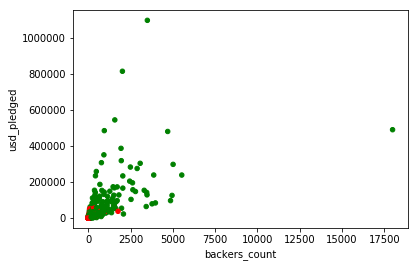

In [62]:
X_test.plot.scatter(
    x="backers_count",y="usd_pledged",
    color = color
)

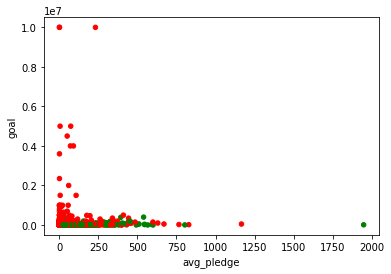

In [63]:
X_test.plot.scatter(
    x="avg_pledge",y="goal",
    color = color
)

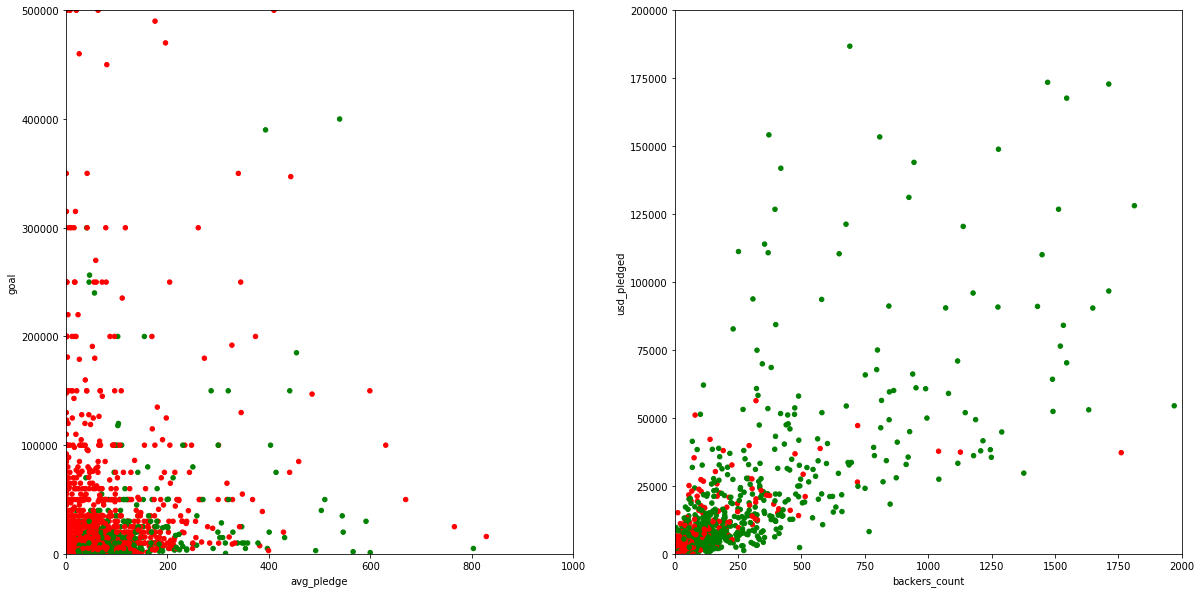

In [64]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,2,figsize=(20,10))

pledge_ax = ax[0]
backers_ax = ax[1]

pledge_ax.set_xlim(right=1000)
pledge_ax.set_ylim(top=500000)

backers_ax.set_xlim(right=2000)
backers_ax.set_ylim(top=200000)

X_test.plot.scatter(
    x="avg_pledge",y="goal",
    color = color, ax=pledge_ax
)

X_test.plot.scatter(
    x="backers_count",y="usd_pledged",
    color = color, ax=backers_ax
)

This is a prediction for an ultimate Gamecube adaptor for the Nintendo Switch on kickstarter.

In [65]:
X_test.loc[ks201902live[ks201902live.id == 351871530].index]

,avg_pledge,goal,backers_count,usd_pledged,Predictions
128812,70.658025,55000.0,1813,128103.0,successful


Conclusion: 

What we can see from the graphs is clearly, having a goal that is too large in general will result in failing. Though having high average pledge dollars does not secure that you will be successful. However looking to the graph on the right, the way to be successful is to have many backers that can feul a high amount of pledge dollars. THis can be helpful to projects who just started and wanted to see how they'll do after a week. Then looking at their goal, current pledge amount, backers and the avergae. They can decide whether they need to increase the amount of publicility and advertisement they should do, or if they can stay consistent in order to achieve their goal. So there must be a balance of a realistic goal that is attainable and gaining many backers that are willing to donate a good enough amount of moeny to supply the total pledged.